In [3]:
## Madeline Hayes ##
## ECE532002 Final Project ##
## Part 2: K Nearest Neighbors ##

In [27]:
# package import

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# set wd

os.chdir("\\Users\\madel\\Documents\\Grad School\\Classes\\Fall 2020\\ECE532\\Final Project")
os.getcwd() # sets wd
#os.listdir(os.getcwd()) # lists files in wd

'C:\\Users\\madel\\Documents\\Grad School\\Classes\\Fall 2020\\ECE532\\Final Project'

In [2]:
# import data
reddf = pd.read_csv("winequality-red.csv",delimiter=';')
whitedf = pd.read_csv("winequality-white.csv",delimiter=';')

# add color label
reddf['color'] = str('red')
whitedf['color']=str('white')
    
# stack df's 
fulldf = pd.concat([reddf, whitedf], ignore_index=True)
#fulldf.head()
#fulldf.tail()

In [ ]:
## Aim: predict rating by knn
## Data will be scaled (regularization depends on scaled data)
## As in Kmeans, remove some features

In [3]:
## Preprocessing: Format Data ##

# encode color as numbers using sk preprocessing
le = preprocessing.LabelEncoder()
encoded_color = le.fit_transform(fulldf['color'])
print(encoded_color)
## red = 0 and white = 1

[0 0 0 ... 1 1 1]


In [4]:
# create working df where color codes are used
colorcodes = encoded_color.tolist()
workingdf = fulldf.drop('color', axis=1)
#workingdf.head()
workingdf['color']=colorcodes
#workingdf.head()

In [5]:
## 1. KNClassifier, All Data ##

## define our data and target
## define target before scaling to ensure categorical quality
target = workingdf['quality'] 

# scale and transform the data
# since knn doesn't handle irregularly shaped data
# each parameter will be scaled between 0 and 1
X=workingdf.drop('quality', axis=1)
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
data = scaleddf

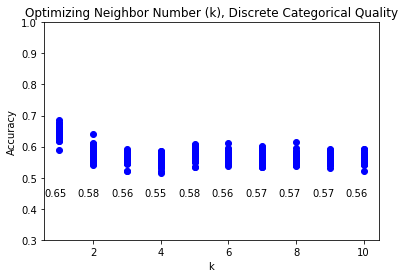

In [6]:
## 1. Optimize Neighbor Number ##

## iteratively cross validate
## with a range of neighbor numbers
## we'll try 1 through 10 neighbors

opt_k = [1,2,3,4,5,6,7,8,9,10]
for k in opt_k:
    accuracy_values = []
    for i in range(30): # cross validate 30 times
        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, target, test_size = 0.1) # split the data 90/10
        knn = KNeighborsClassifier(n_neighbors = k) # define the KNN model with k from above
        knn.fit(X_train, y_train) # train on training set
        y_pred = knn.predict(X_test) # predict test set
        accuracy = metrics.accuracy_score(y_test, y_pred) # percent of correct labels
        plt.plot(k,accuracy,'bo') # plot each accuracy metric for every split with its appropriate k
        accuracy_values.append(accuracy)
    mean = np.round_((sum(accuracy_values)/len(accuracy_values)), decimals=2) # plot the mean accuracy metric over all splits
    plt.annotate(mean, xy=(((k/10)-0.1), 0.2), xycoords='axes fraction')
plt.title('Optimizing Neighbor Number (k), Discrete Categorical Quality')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.ylim(0.3, 1.0)
#plt.savefig('k_optimization_discrete.png', bbox='tight')
plt.show()
plt.close()

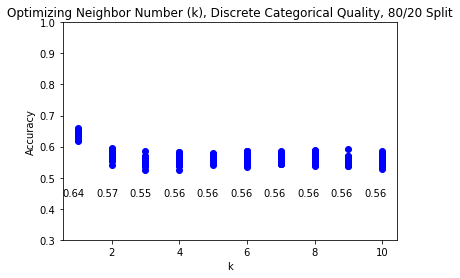

In [53]:
## iteratively cross validate
## try a different size split, just for kicks

opt_k = [1,2,3,4,5,6,7,8,9,10]
for k in opt_k:
    accuracy_values = []
    for i in range(30): # cross validate 30 times
        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, target, test_size = 0.2) # split the data 80/20
        knn = KNeighborsClassifier(n_neighbors = k) # define the KNN model with k from above
        knn.fit(X_train, y_train) # train on training set
        y_pred = knn.predict(X_test) # predict test set
        accuracy = metrics.accuracy_score(y_test, y_pred) # percent of correct labels
        plt.plot(k,accuracy,'bo') # plot each accuracy metric for every split with its appropriate k
        accuracy_values.append(accuracy)
    mean = np.round_((sum(accuracy_values)/len(accuracy_values)), decimals=2) # plot the mean accuracy metric over all splits
    plt.annotate(mean, xy=(((k/10)-0.1), 0.2), xycoords='axes fraction')
plt.title('Optimizing Neighbor Number (k), Discrete Categorical Quality, 80/20 Split')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.ylim(0.3, 1.0)
#plt.savefig('k_optimization_discrete_80.20.png', bbox='tight')
plt.show()
plt.close()

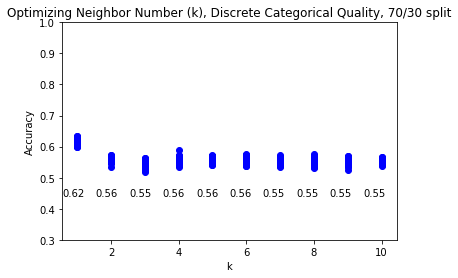

In [55]:
## iteratively cross validate
## try a different size split, just for kicks

opt_k = [1,2,3,4,5,6,7,8,9,10]
for k in opt_k:
    accuracy_values = []
    for i in range(30): # cross validate 30 times
        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, target, test_size = 0.3) # split the data 70/30
        knn = KNeighborsClassifier(n_neighbors = k) # define the KNN model with k from above
        knn.fit(X_train, y_train) # train on training set
        y_pred = knn.predict(X_test) # predict test set
        accuracy = metrics.accuracy_score(y_test, y_pred) # percent of correct labels
        plt.plot(k,accuracy,'bo') # plot each accuracy metric for every split with its appropriate k
        accuracy_values.append(accuracy)
    mean = np.round_((sum(accuracy_values)/len(accuracy_values)), decimals=2) # plot the mean accuracy metric over all splits
    plt.annotate(mean, xy=(((k/10)-0.1), 0.2), xycoords='axes fraction')
plt.title('Optimizing Neighbor Number (k), Discrete Categorical Quality, 70/30 split')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.ylim(0.3, 1.0)
#plt.savefig('k_optimization_discrete_70.30.png', bbox='tight')
plt.show()
plt.close()

In [7]:
## Evaluate the performance of k=1 on a holdout set

# split the data 80/20
finaltraindata = workingdf.sample(frac=0.8).sort_index() 
evaldata_X = workingdf.drop(finaltraindata.index)
evaldata_Y = evaldata_X['quality']

## define our data and target
## define target before scaling to ensure categorical quality
target = finaltraindata['quality'] 

# scale and transform the data
X=finaltraindata.drop('quality', axis=1)
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
data = scaleddf

In [8]:
## train the model on the final train data with optimal k=1

knn = KNeighborsClassifier(n_neighbors = 1) # define the KNN model with k from above
knn.fit(finaltraindata, target) # train on training set
y_pred = knn.predict(evaldata_X) # predict test set
accuracy = metrics.accuracy_score(evaldata_Y, y_pred) # percent of correct labels
print(accuracy)

0.6458814472671286


In [9]:
## 2. Selective Data ##
## use intuition to remove some data
## first remove alcohol, then alcohol and color

trimdf = workingdf.drop('alcohol', axis=1)

## define our data and target
## define target before scaling to ensure categorical quality
target = trimdf['quality'] 

# scale and transform the data
# since knn doesn't handle irregularly shaped data
# each parameter will be scaled between 0 and 1
X=trimdf.drop('quality', axis=1)
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
data = scaleddf

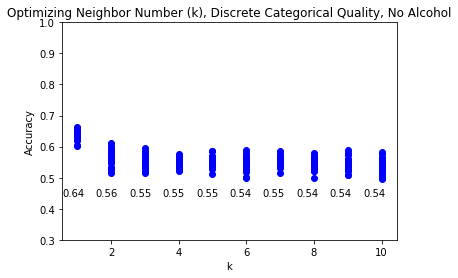

In [10]:
## Optimize Neighbor Number ##

## iteratively cross validate
## with a range of neighbor numbers
## we'll try 1 through 10 neighbors

opt_k = [1,2,3,4,5,6,7,8,9,10]
for k in opt_k:
    accuracy_values = []
    for i in range(30): # cross validate 30 times
        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, target, test_size = 0.1) # split the data 90/10
        knn = KNeighborsClassifier(n_neighbors = k) # define the KNN model with k from above
        knn.fit(X_train, y_train) # train on training set
        y_pred = knn.predict(X_test) # predict test set
        accuracy = metrics.accuracy_score(y_test, y_pred) # percent of correct labels
        plt.plot(k,accuracy,'bo') # plot each accuracy metric for every split with its appropriate k
        accuracy_values.append(accuracy)
    mean = np.round_((sum(accuracy_values)/len(accuracy_values)), decimals=2) # plot the mean accuracy metric over all splits
    plt.annotate(mean, xy=(((k/10)-0.1), 0.2), xycoords='axes fraction')
plt.title('Optimizing Neighbor Number (k), Discrete Categorical Quality, No Alcohol')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.ylim(0.3, 1.0)
#plt.savefig('k_optimization_discrete_trim1.png', bbox='tight')
plt.show()
plt.close()

In [11]:
## Evaluate the performance of k=1 on a holdout set

# split the data 80/20
finaltraindata = trimdf.sample(frac=0.8).sort_index() 
evaldata_X = trimdf.drop(finaltraindata.index)
evaldata_Y = evaldata_X['quality']

## define our data and target
## define target before scaling to ensure categorical quality
target = finaltraindata['quality'] 

# scale and transform the data
X=finaltraindata.drop('quality', axis=1)
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
data = scaleddf

In [12]:
## train the model on the final train data with optimal k=1

knn = KNeighborsClassifier(n_neighbors = 1) # define the KNN model with k from above
knn.fit(finaltraindata, target) # train on training set
y_pred = knn.predict(evaldata_X) # predict test set
accuracy = metrics.accuracy_score(evaldata_Y, y_pred) # percent of correct labels
print(accuracy)

0.6443418013856813


In [13]:
## remove alcohol and color ##

trimdf = workingdf.drop('alcohol', axis=1)
trimdf = trimdf.drop('color', axis=1)

## define our data and target
## define target before scaling to ensure categorical quality
target = trimdf['quality'] 

# scale and transform the data
X=trimdf.drop('quality', axis=1)
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
data = scaleddf

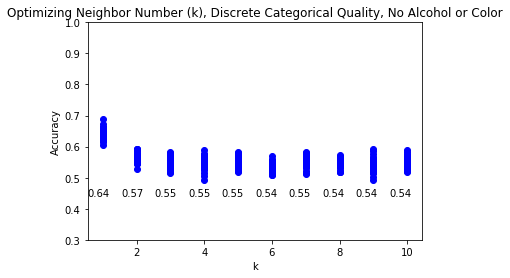

In [14]:
## Optimize Neighbor Number ##

## iteratively cross validate
## with a range of neighbor numbers
## we'll try 1 through 10 neighbors

opt_k = [1,2,3,4,5,6,7,8,9,10]
for k in opt_k:
    accuracy_values = []
    for i in range(30): # cross validate 30 times
        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, target, test_size = 0.1) # split the data 90/10
        knn = KNeighborsClassifier(n_neighbors = k) # define the KNN model with k from above
        knn.fit(X_train, y_train) # train on training set
        y_pred = knn.predict(X_test) # predict test set
        accuracy = metrics.accuracy_score(y_test, y_pred) # percent of correct labels
        plt.plot(k,accuracy,'bo') # plot each accuracy metric for every split with its appropriate k
        accuracy_values.append(accuracy)
    mean = np.round_((sum(accuracy_values)/len(accuracy_values)), decimals=2) # plot the mean accuracy metric over all splits
    plt.annotate(mean, xy=(((k/10)-0.1), 0.2), xycoords='axes fraction')
plt.title('Optimizing Neighbor Number (k), Discrete Categorical Quality, No Alcohol or Color')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.ylim(0.3, 1.0)
#plt.savefig('k_optimization_discrete_trim2.png', bbox='tight')
plt.show()
plt.close()

In [15]:
## Evaluate the performance of k=1 on a holdout set

# split the data 80/20
finaltraindata = trimdf.sample(frac=0.8).sort_index() 
evaldata_X = trimdf.drop(finaltraindata.index)
evaldata_Y = evaldata_X['quality']

## define our data and target
## define target before scaling to ensure categorical quality
target = finaltraindata['quality'] 

# scale and transform the data
X=finaltraindata.drop('quality', axis=1)
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf=pd.DataFrame(scaler.transform(X))
data = scaleddf

In [16]:
## train the model on the final train data with optimal k=1

knn = KNeighborsClassifier(n_neighbors = 1) # define the KNN model with k from above
knn.fit(finaltraindata, target) # train on training set
y_pred = knn.predict(evaldata_X) # predict test set
accuracy = metrics.accuracy_score(evaldata_Y, y_pred) # percent of correct labels
print(accuracy)

0.674364896073903


In [6]:
## 3. KNRegressor, All Data ##
# treat quality as continuous instead of discrete

## define our data and target
## define target after scaling to ensure continuous values for quality
## scale and transform the data
X=workingdf
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf = pd.DataFrame(scaler.transform(X))
#scaleddf.head()
target = scaleddf[11] # after scaling, column names were given numbers
#print(target)
data = scaleddf.drop(11, axis=1)

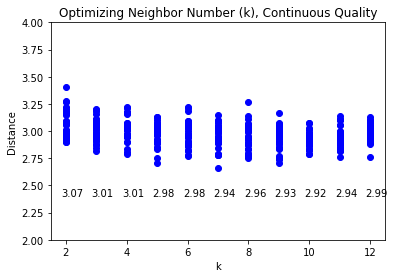

In [54]:
## iteratively cross validate
## with a range of neighbor numbers
## we'll try 1 through 10 neighbors

opt_k = [2,3,4,5,6,7,8,9,10,11,12]
for k in opt_k:
    distances = []
    for i in range(30): # cross validate 30 times
        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, target, test_size = 0.1) # split the data 90/10
        knn = KNeighborsRegressor(n_neighbors = k) # define the KNN model with k from above
        knn.fit(X_train, y_train) # train on training set
        y_pred = knn.predict(X_test) # predict test set
        dist = np.linalg.norm(y_test-y_pred) # 2-norm distance between true rating and predicted rating
        plt.plot(k,dist,'bo') # plot each distance for every split with its appropriate k
        distances.append(dist)
        #print(dist)
        #print(np.shape(dist))
    mean = np.round_((sum(distances)/len(distances)), decimals=2) # plot the mean distance over all splits
    plt.annotate(mean, xy=(((k/11-0.15)), 0.2), xycoords='axes fraction')
plt.title('Optimizing Neighbor Number (k), Continuous Quality')
plt.xlabel('k')
plt.ylabel('Distance')
plt.ylim(2,4)
plt.savefig('k_optimization_continuous.png', bbox='tight')
plt.show()
plt.close()

In [ ]:
## looks like k=10 has a slight edge

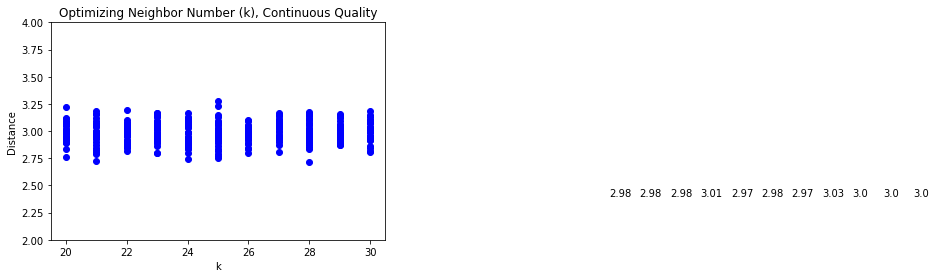

In [51]:
## iteratively cross validate
## move farther out to ensure that more neighbors eventually has diminishing returns

opt_k = [20,21,22,23,24,25,26,27,28,29,30]
for k in opt_k:
    distances = []
    for i in range(30): # cross validate 30 times
        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, target, test_size = 0.1) # split the data 90/10
        knn = KNeighborsRegressor(n_neighbors = k) # define the KNN model with k from above
        knn.fit(X_train, y_train) # train on training set
        y_pred = knn.predict(X_test) # predict test set
        dist = np.linalg.norm(y_test-y_pred) # 2-norm distance between true rating and predicted rating
        plt.plot(k,dist,'bo') # plot each distance for every split with its appropriate k
        distances.append(dist)
        #print(dist)
        #print(np.shape(dist))
    mean = np.round_((sum(distances)/len(distances)), decimals=2) # plot the mean distance over all splits
    plt.annotate(mean, xy=(((k/11-0.15)), 0.2), xycoords='axes fraction')
plt.title('Optimizing Neighbor Number (k), Continuous Quality')
plt.xlabel('k')
plt.ylabel('Distance')
plt.ylim(2,4)
#plt.savefig('k_optimization_discrete.png', bbox='tight')
plt.show()
plt.close()

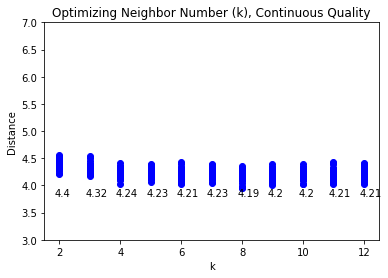

In [53]:
## try different data split to make sure that k=10 still has lowest distance

opt_k = [2,3,4,5,6,7,8,9,10,11,12]
for k in opt_k:
    distances = []
    for i in range(30): # cross validate 30 times
        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, target, test_size = 0.2) # split the data 80/20
        knn = KNeighborsRegressor(n_neighbors = k) # define the KNN model with k from above
        knn.fit(X_train, y_train) # train on training set
        y_pred = knn.predict(X_test) # predict test set
        dist = np.linalg.norm(y_test-y_pred) # 2-norm distance between true rating and predicted rating
        plt.plot(k,dist,'bo') # plot each distance for every split with its appropriate k
        distances.append(dist)
        #print(dist)
        #print(np.shape(dist))
    mean = np.round_((sum(distances)/len(distances)), decimals=2) # plot the mean distance over all splits
    plt.annotate(mean, xy=(((k/11-0.15)), 0.2), xycoords='axes fraction')
plt.title('Optimizing Neighbor Number (k), Continuous Quality')
plt.xlabel('k')
plt.ylabel('Distance')
plt.ylim(3,7)
#plt.savefig('k_optimization_discrete.png', bbox='tight')
plt.show()
plt.close()

In [ ]:
## k = 10 has the lowest value here too,
## the overall average distance increasing is expected
## decreasing training data will increase error regardless of k

In [14]:
## Evaluate the performance of k=10 on a holdout set

## scale and transform the data
## ensure continuous variable for quality
X=workingdf
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf = pd.DataFrame(scaler.transform(X))

In [15]:
## split the data 80/20
finaltraindata = scaleddf.sample(frac=0.8).sort_index() 
evaldata_X = scaleddf.drop(finaltraindata.index) # define final eval data as everything but the training data
evaldata_Y = evaldata_X[11] # define the final eval labels as the quality column

evaldata_X = evaldata_X.drop(11, axis=1) ## have to have shape match below, probably a better way to fix this /shrug

In [16]:
# define target as the training data's quality ratings
target = finaltraindata[11] # after scaling, column names were given numbers

# define data as the scaled training set, drop quality
data = finaltraindata.drop(11, axis=1)


In [13]:
## evaluate a k=10 regressor on the holdout set

knn = KNeighborsRegressor(n_neighbors = 10) # define the KNN model with optimized k
knn.fit(data, target) # train on final training set
y_pred = knn.predict(evaldata_X) # predict test set
dist = np.linalg.norm(evaldata_Y-y_pred) # 2-norm distance between true rating and predicted rating
print(dist)

4.240872551728005


y=0.895838976837124x+0.04653366138193332, r=0.599827491125824, p=9.237406143870136e-128, n=1299


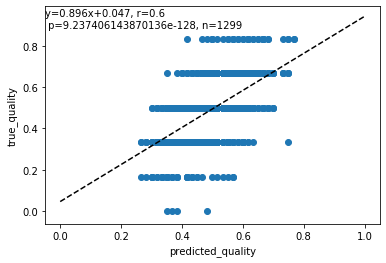

In [37]:
## this can be represented on a plot

knn = KNeighborsRegressor(n_neighbors = 10) # define the KNN model with optimized k
knn.fit(data, target) # train on final training set
y_pred = knn.predict(evaldata_X) # predict test set
m,slope,r,p,stderr=sp.stats.linregress(y_pred, evaldata_Y)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(y_pred)))
z=np.linspace(0,1,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.annotate('y='+str(np.round(m,3))+'x+'+str(np.round(slope,3))+', r='+str(np.round(r,3))+'\n p='+str(p)+', n='+str(len(y_pred)),(0,.90), xycoords='axes fraction')
plt.scatter(y_pred,evaldata_Y)
plt.xlabel('predicted_quality')
plt.ylabel('true_quality')
#plt.savefig('knn_continuous_finalmodelfit')
plt.show()
plt.close()

In [48]:
### Finally, perform manual feature selection
### removing color and alcohol content did not do much earlier
### but may do more now

trimdf = workingdf.drop('alcohol', axis=1)
trimdf = trimdf.drop('color', axis=1)
#trimdf.head()

In [49]:
## scale and transform the data
## ensure continuous variable for quality
X=trimdf
scaler = MinMaxScaler() 
scaler.fit(X)
scaleddf = pd.DataFrame(scaler.transform(X))
#scaleddf.head()

In [50]:
## split the data 80/20
finaltraindata = scaleddf.sample(frac=0.8).sort_index() 
evaldata_X = scaleddf.drop(finaltraindata.index) # define final eval data as everything but the training data
evaldata_Y = evaldata_X[10] # define the final eval labels as the quality column
evaldata_X = evaldata_X.drop(10, axis=1) ## have to have shape match below

# define target as the training data's quality ratings
target = finaltraindata[10] # after scaling, column names were given numbers

# define data as the scaled training set, drop quality
data = finaltraindata.drop(10, axis=1)

In [51]:
## evaluate a k=10 regressor on the holdout set

knn = KNeighborsRegressor(n_neighbors = 10) # define the KNN model with optimized k
knn.fit(data, target) # train on final training set
y_pred = knn.predict(evaldata_X) # predict test set
dist = np.linalg.norm(evaldata_Y-y_pred) # 2-norm distance between true rating and predicted rating
print(dist)

4.351021591406883


y=0.8721231503887162x+0.05030538183777278, r=0.5386335633726077, p=1.2714122746607252e-98, n=1299


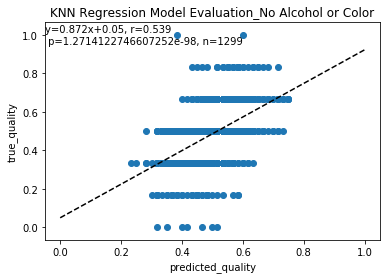

In [52]:
## this can be represented on a plot

knn = KNeighborsRegressor(n_neighbors = 10) # define the KNN model with optimized k
knn.fit(data, target) # train on final training set
y_pred = knn.predict(evaldata_X) # predict test set
m,slope,r,p,stderr=sp.stats.linregress(y_pred, evaldata_Y)
print('y='+str(m)+'x+'+str(slope)+', r='+str(r)+', p='+str(p)+', n='+str(len(y_pred)))
z=np.linspace(0,1,100)
plt.plot(z,m*z+slope,linestyle='dashed',color='k')
plt.annotate('y='+str(np.round(m,3))+'x+'+str(np.round(slope,3))+', r='+str(np.round(r,3))+'\n p='+str(p)+', n='+str(len(y_pred)),(0,.90), xycoords='axes fraction')
plt.scatter(y_pred,evaldata_Y)
plt.title('KNN Regression Model Evaluation_No Alcohol or Color')
plt.xlabel('predicted_quality')
plt.ylabel('true_quality')
plt.savefig('knn_continuous_finalmodelfit_trim2')
plt.show()
plt.close()